In [129]:
!pip install keras-facenet

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [130]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import load_model
from keras_facenet import FaceNet
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

In [8]:
proj_path = '/content/drive/MyDrive/cs539_project'

# Preprocessing Data

(250, 250, 3)


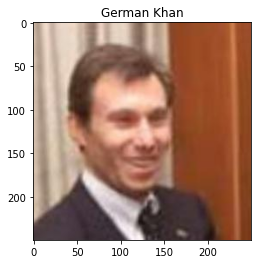

In [9]:
# Look at arbitrary images in the dataset
for dirName, subdirList, fileList in os.walk(proj_path + '/lfw-deepfunneled/German_Khan'):
    for f in fileList:
        img = cv2.imread(os.path.join(dirName, f))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        print(img.shape)
        plt.imshow(img)
        plt.title(' '.join(dirName.split('/')[-1].split('_')))

In [16]:
img_count = 0
ppl_count = 0
for l in os.listdir(proj_path + '/lfw-deepfunneled'):
  if l != './lfw-deepfunneled' and l != '.DS_Store':
      ppl_count += 1
      dirName = os.path.join(proj_path + '/lfw-deepfunneled', l)
      #print(dirName, os.listdir(dirName))
      img_count += len(os.listdir(dirName))
print(f'Dataset contains {img_count} images from {ppl_count} people.')

Dataset contains 13233 images from 5749 people.


In [86]:
# use haar cascade to detect faces in the images
def crop_face(img):
  clf = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
  
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  
  gray = np.array(gray, dtype='uint8')
  faces = clf.detectMultiScale(gray, 1.3, 3)
  
  cropped_img = None
  for (x, y, w, h) in faces:
    cropped_img = img[y:y+h,x:x+w]
  if cropped_img is None:
    cropped_img = cv2.resize(img[61:189,61:189], (160,160))
  cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
  return cv2.resize(cropped_img, (160,160))

/content/drive/MyDrive/cs539_project/lfw-deepfunneled/Debra_Brown/Debra_Brown_0002.jpg
/content/drive/MyDrive/cs539_project/lfw-deepfunneled/Debra_Brown/Debra_Brown_0001.jpg
/content/drive/MyDrive/cs539_project/lfw-deepfunneled/Leo_Mullin/Leo_Mullin_0001.jpg
/content/drive/MyDrive/cs539_project/lfw-deepfunneled/Jerry_McEntee/Jerry_McEntee_0001.jpg


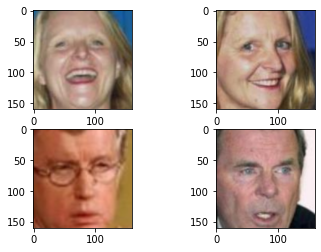

In [87]:
# Display a few images after face detection and cropping
c = 0
fig, ax = plt.subplots(2,2)
idx = 0
for l in os.listdir(proj_path + '/lfw-deepfunneled'):
    if l != './lfw-deepfunneled' and l != '.DS_Store':
        for i in os.listdir(os.path.join(proj_path + '/lfw-deepfunneled',l)):
            img_name = os.path.join(os.path.join(proj_path + '/lfw-deepfunneled', l), i)
            print(img_name)
            img = cv2.imread(img_name)
            ax[idx//2,idx%2].imshow(crop_face(img))
            idx += 1
        c += 1
        if c >= 3:
            break

In [107]:
# store faces of every person in the dataset, might take ~10-15 minutes
faces = []
ppl = []
count = 0
for l in os.listdir(proj_path + '/lfw-deepfunneled'):
    if l != './lfw-deepfunneled' and l != '.DS_Store':
        for i in os.listdir(os.path.join(proj_path + '/lfw-deepfunneled',l)):
            img_name = os.path.join(os.path.join(proj_path + '/lfw-deepfunneled', l), i)
            person_name = img_name.split('/')[6]
            if not img_name.endswith('.DS_Store'):
                img = cv2.imread(img_name)
                cropped_img = crop_face(img)
                faces.append(cropped_img)
                ppl.append(person_name)
                count += 1
                if count % 1000 == 0:
                  print(count)
# datagen = ImageDataGenerator(preprocessing_function=crop_face, validation_split=0.2, rescale=1./255)
# train_gen = datagen.flow_from_directory(proj_path + '/lfw-deepfunneled', subset='training', target_size=(160, 160), color_mode='rgb')
# test_gen = datagen.flow_from_directory(proj_path + '/lfw-deepfunneled', subset='validation', target_size=(160, 160), color_mode='rgb')

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000


In [108]:
# x_batch, y_batch = train_gen.next()
# for i in range (0,2):
#     image = x_batch[i]
#     #print(image.shape)
#     #print(y_batch[i].shape)
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.show()
len(faces)

13233

In [126]:
uniq_ppl = list(np.unique(ppl))
names = ppl.copy()

# convert labels from string to integer representation
for i in range(len(names)):
    names[i] = uniq_ppl.index(ppl[i])
len(uniq_ppl)

5749

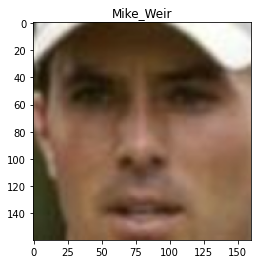

In [133]:
# Example image from dataset
idx = random.randint(0,len(faces)-1)
plt.imshow(faces[idx])
plt.title(ppl[idx])
plt.show()

In [134]:
# One-hot encodes the labels
names = tf.keras.utils.to_categorical(names)

In [145]:
# check that the one-hot encoding is correct
assert np.argmax(names[0]) == uniq_ppl.index(ppl[0])